# Cardiovascular Risks Factors


Le projet porte sur l'étude des risques des maladies cardiovasculaires.
La régression logistique est le modèle appliqué pour mieux prédire le risque de capter ces maladies.
Le dataset est issu d'une récolte de données des patients auprès des médecins généralistes

#### Importation des librairies

In [1]:
#--- Transform, clean data ---#
import pandas as pd
import numpy as np

#--- Manage Missing values ---#
import missingno as msno

#--- Data visualisation ---#
import matplotlib.pyplot as plt
import seaborn as sns

#--- Data pre processing ---#

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

#--- Machine learning model : Logistic regression ---#
from sklearn.linear_model import LogisticRegression

#--- Metrics ---#
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

#### 1- VEILLE SUR LA REGRESSION LOGISTIQUE

La régression logistique est un algorithme de classification. Elle est utilisée pour prédire un résultat binaire en fonction d'un ensemble de variables indépendantes.En effet, un résultat binaire est un résultat pour lequel il n'existe que deux scénarios possibles : soit l'événement se produit (1), soit il ne se produit pas (0).
Ainsi, il existe des hypothèses pour l'application de la régression logistique :

- Les variables indépendantes présentent une relation linéaire avec le log des variables de sortie.
- Non-collinéarité entre les variables indépendantes. C'est-à-dire que les variables indépendantes sont indépendantes les unes des autres.
- La variable de sortie est binaire.

En effet, il existe trois types de régression logistique :
- la régression logistique binaire qui est la technique statistique utilisée pour prédire la relation entre la variable dépendante (Y) et la variable indépendante (X), où la variable dépendante est de nature binaire.
- La régression logistique multinomiale  qui est utilisée lorsque vous avez une variable dépendante catégorique avec deux ou plusieurs niveaux non ordonnés (c'est-à-dire deux ou plusieurs résultats discrets).
- La régression logistique ordinale qui est utilisée lorsque la variable dépendante (Y) est ordonnée (c'est-à-dire ordinale).

Par ailleurs, elle est utilisée dans divers domaines, notamment l'apprentissage automatique, la plupart des domaines médicaux
et les sciences sociales.

La régression logistique a des avantages comme des inconvénients :
- Pour les avantages :
	* La régression logistique est beaucoup plus facile à mettre en œuvre que les autres méthodes, notamment dans le contexte de l'apprentissage automatique
	* La régression logistique fournit des informations utiles
- Pour les inconvénients :
	* La régression logistique peut ne pas être précise si la taille de l'échantillon est trop petite.


In [2]:
df_cardio = pd.read_csv('./data/cardio_train.csv', sep=";")
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### -  Exploratory data analysis

##### - Le dataset est composé de 70000 observations et 12 variables 
##### - Les variables sont de type numériques ( int et float)
##### - Il n'y a pas de valeurs manquantes

In [3]:
# Suppression de la colonne 'id'
df_cardio.drop(['id'],axis=1, inplace=True)
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Dimension du dataset
df_cardio.shape

(70000, 12)

In [5]:
# informations globales (colonne, type variable, valeurs nulles)
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
# type des variables
df_cardio.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
# nombre de chaque variable nmérique
df_cardio.dtypes.value_counts()

int64      11
float64     1
dtype: int64

In [8]:
df_cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:>

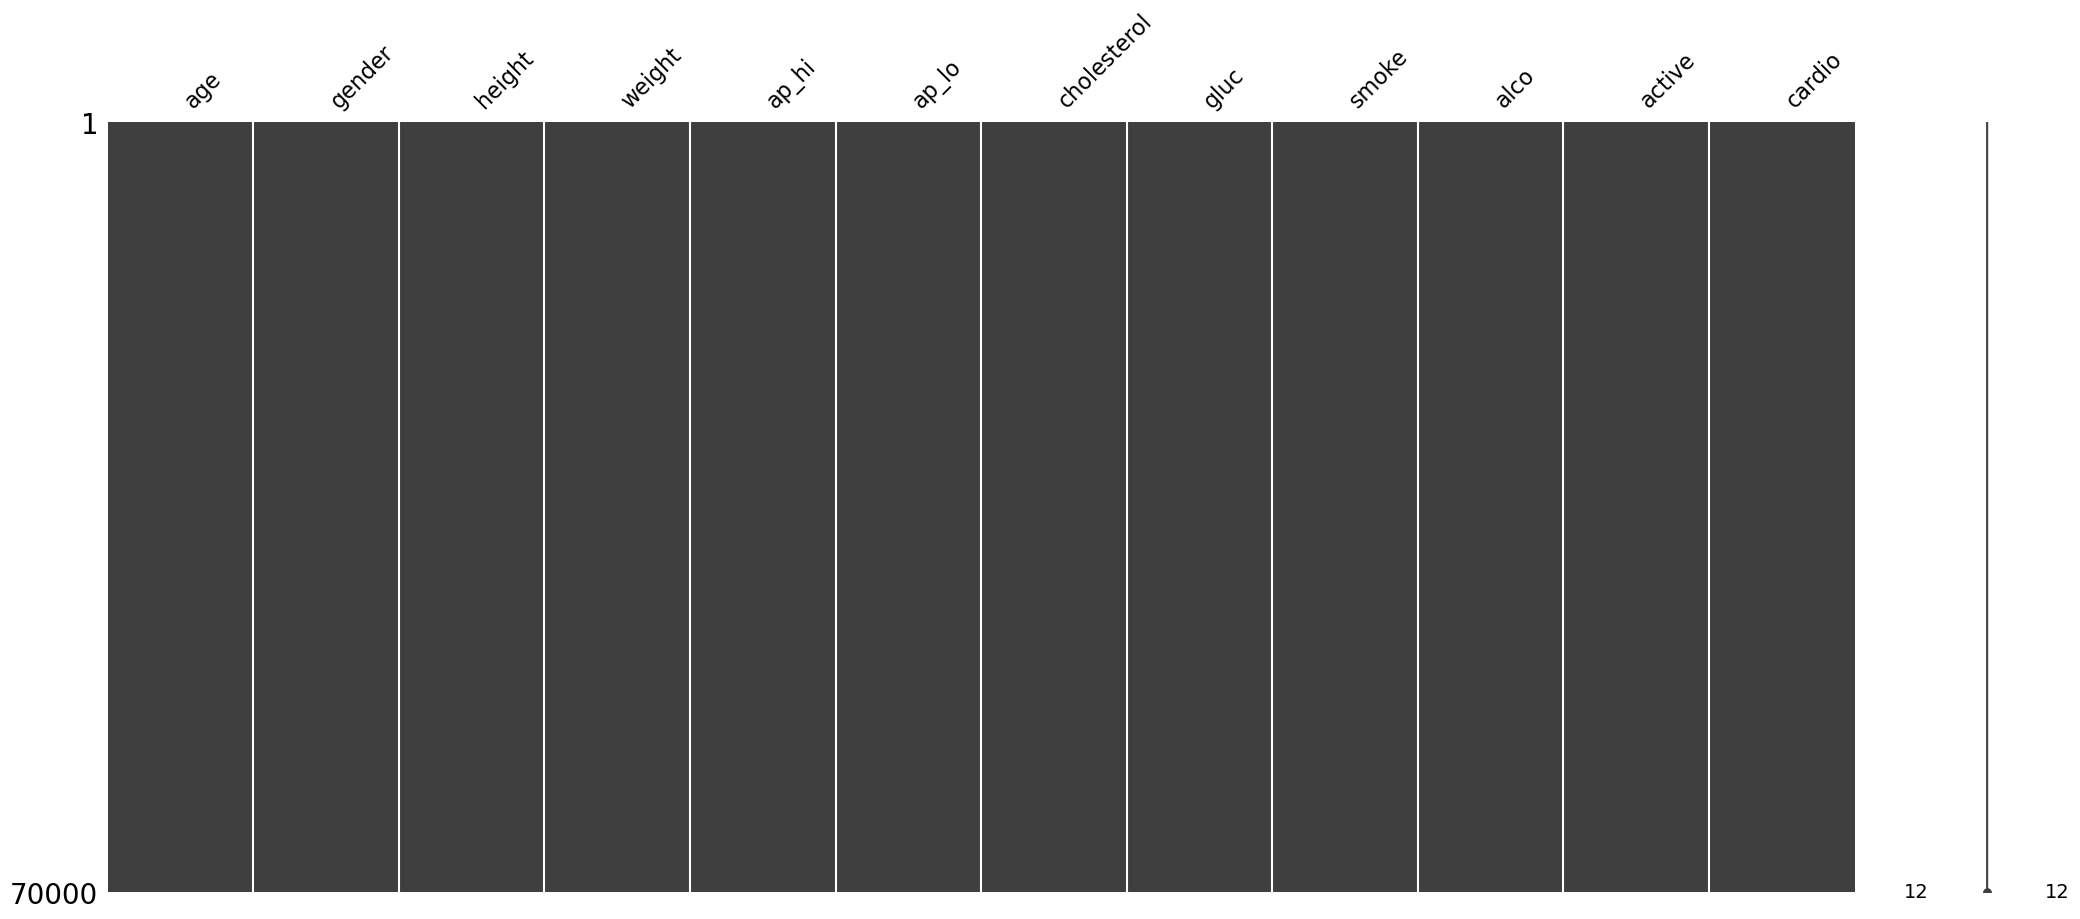

In [9]:
# recherche valeurs manquantes
msno.matrix(df_cardio)

In [10]:
# résumé statistique des variables
df_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


##### - le résumé des valeurs statistiques des variables sont représentées dans la matrice ( les quartiles, moyennes, écart-type, etc)
##### - Les valeurs max et min révèlent quelque fois l'existence des valeurs abérrantes dont la confirmation se fera plutard par une visualisation.

In [11]:
# corrélation des variables
df_cardio.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


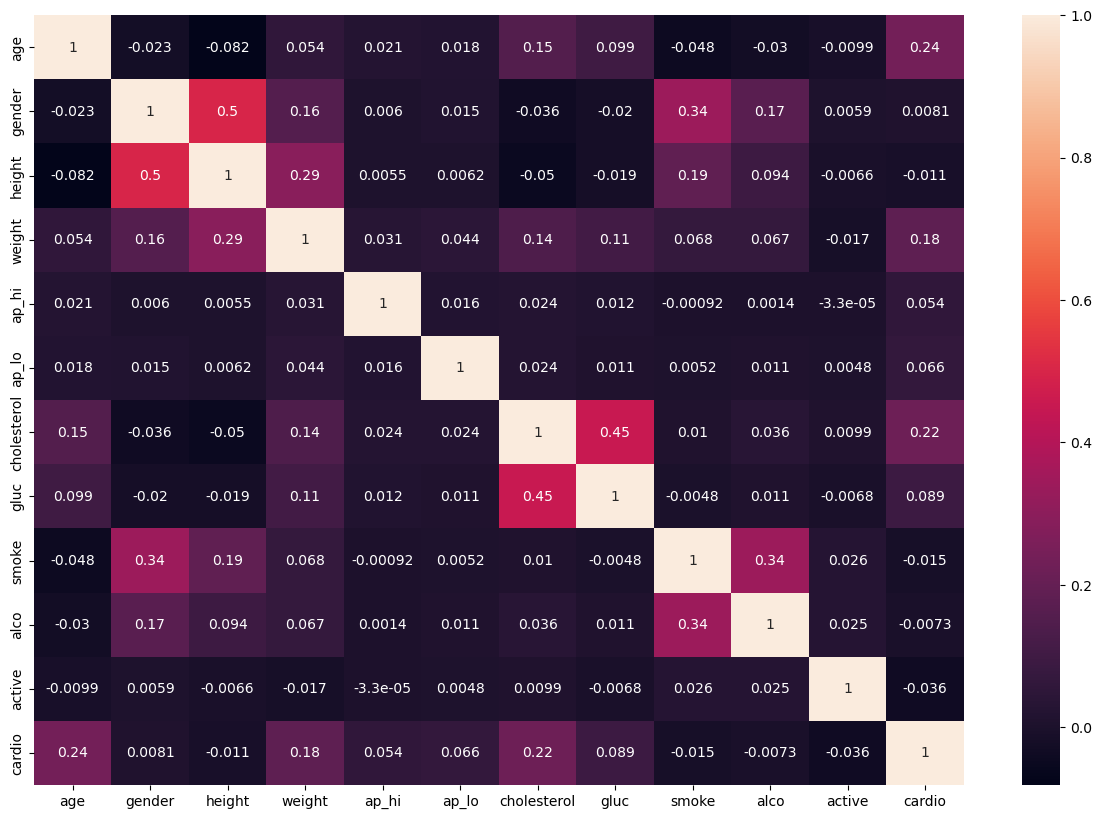

In [12]:
# matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(df_cardio.corr(), annot= True)
#plt.savefig("./plotss/data_cardio_correlation.png")
plt.show()

##### - cette matrice de corrélation affche la corrélation entre les variables avec les coefficients de corrélation.
##### - Certaines variables sont positivement corréllées et d'autres négativement corréllées.

In [13]:
# moyenne des variables selon les sujets cardio et non cardio
df_cardio.groupby('cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


### 2- Visualisation et analyse des données avec matplotlib et seaborn

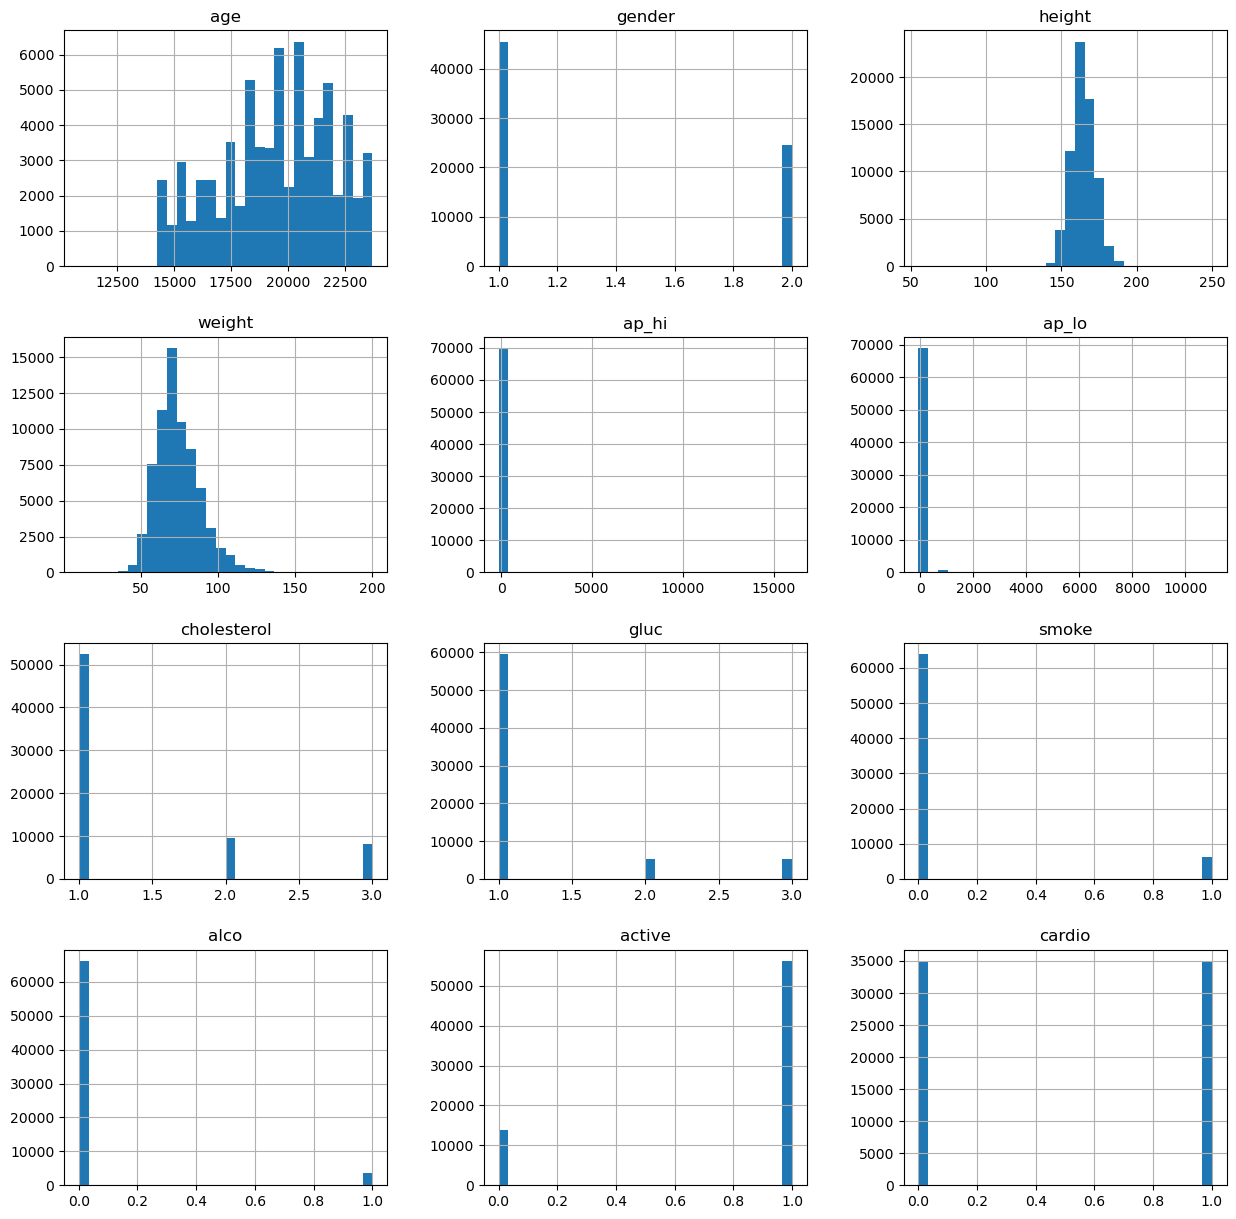

In [14]:
# histogramme des variables
df_cardio.hist(bins=30, figsize=(15,15))
#plt.savefig("./plotss/cardiodata_distribution.png")
plt.show()

##### Ces histogrammes renseignent la dispersion des données :
##### - Pour l'àge, la dispersion des données s'étend de 15000 à environ 24000. Le pic des àges se trouvent autour de 20000
#### - Gender : y a beaucoup plus de femmes que d'hommes
#### - height : le pic se trouve s'élève environ 160
#### - cholesterol : le nombre de patients ayant un taux de cholésterol normal est largement supérieur, viennent ensuite ceux dont le #### - taux de cholésterol est au - dessus de la normal et enfin ceux dont ce taux est très trèes au dessus. Ceci est valable pour le                   taux de glucose
#### - smoke, alcohol :y a plus de sujets qui fument et boivent
#### - active : la quasi-totalité des sujets ont une activité physique
#### - cardio : il y a autant de patients qui ont la cardio que ceux qui ne l'ont pas

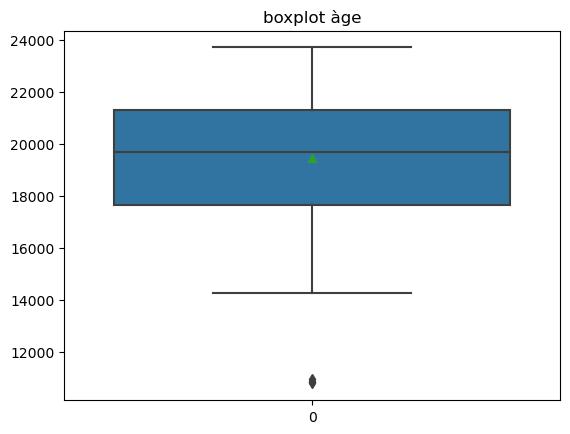

In [15]:
# Boxplot variable age
sns.boxplot(data=df_cardio['age'], showmeans=True)
plt.title('boxplot àge')
plt.savefig("./plotss/age_.png")
plt.show()

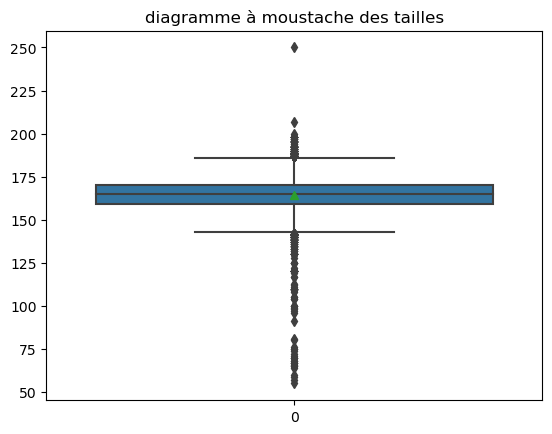

In [16]:
# Visualisation de la variable height
sns.boxplot(data=df_cardio['height'], showmeans = True)
#plt.savefig("./plotss/répart_taille.png")
plt.title('diagramme à moustache des tailles')
plt.show()

##### - Présence de valeurs abérrantes au niveau de la variables height . La moyenne se tourne autour de 170 .

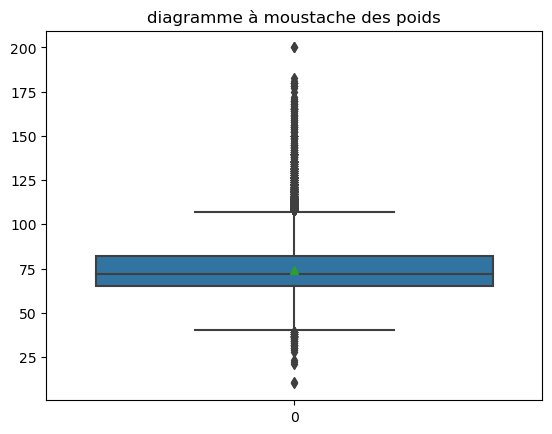

In [17]:
sns.boxplot(data=df_cardio['weight'], showmeans = True)
plt.savefig("./plotss/répart_poids.png")
plt.title('diagramme à moustache des poids')
plt.show()

#### - Présence de valeurs abérrantes dans la variable weight . La moyenne est au environ de 65.

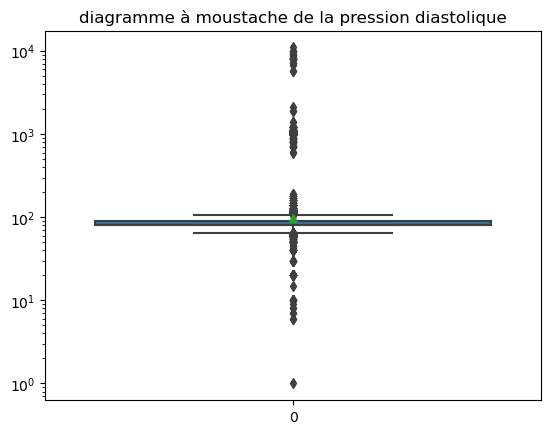

In [18]:
sns.boxplot(data=df_cardio['ap_lo'], showmeans = True)
plt.yscale('log')
plt.title('diagramme à moustache de la pression diastolique')
plt.savefig("./plotss/diastolic_blood.png")

##### - Présence de valeurs abèrrantes dans la variable 'ap_lo'

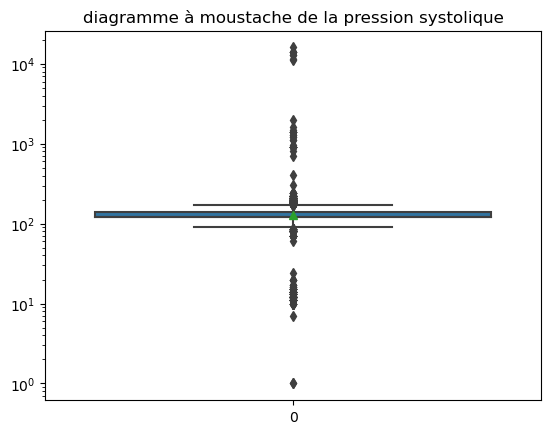

In [19]:
sns.boxplot(data=df_cardio['ap_hi'], showmeans= True)
plt.yscale('log')
plt.title('diagramme à moustache de la pression systolique')
plt.savefig("./plotss/systolic_blood.png")

0    35021
1    34979
Name: cardio, dtype: int64


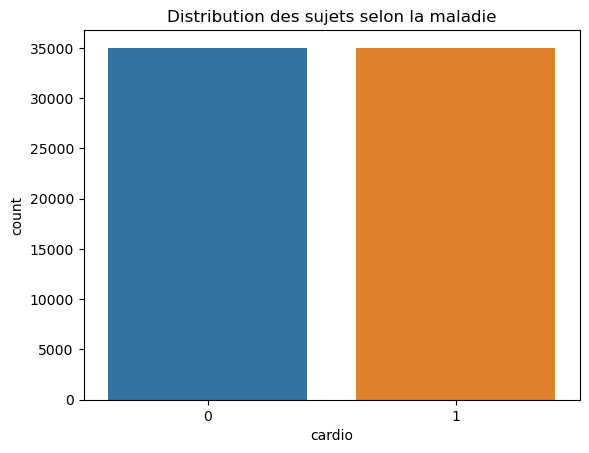

In [20]:
# Répartition des sujets 

print(df_cardio['cardio'].value_counts())
sns.countplot(x='cardio', data=df_cardio) # visulalise the distribution of target column 
plt.title("Distribution des sujets selon la maladie")
plt.savefig("./plotss/cardio_patients.png")
plt.show()

##### - Il y a autant de sujets qui ont la cardio que ceux qui ne l'ont pas. Le target est équilibré

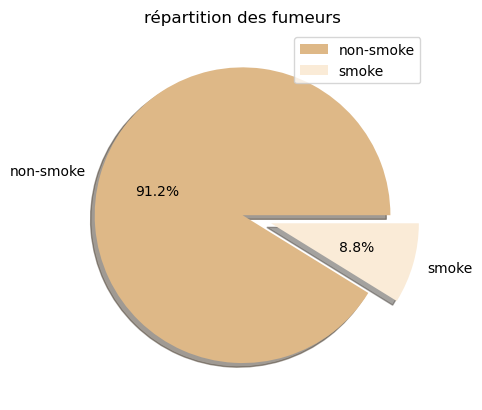

In [21]:
# Pie chart
smoke_value = df_cardio.smoke.value_counts()
mylabel = ['non-smoke','smoke']
myexplode = [0, 0.2]
mycolors = ['#DEB887','#FAEBD7']
plt.pie(smoke_value, labels=mylabel, explode = myexplode, colors=mycolors,autopct='%1.1f%%',shadow = True)
plt.legend()
plt.title('répartition des fumeurs')
plt.savefig("./plotss/repart_fumeurs.png")

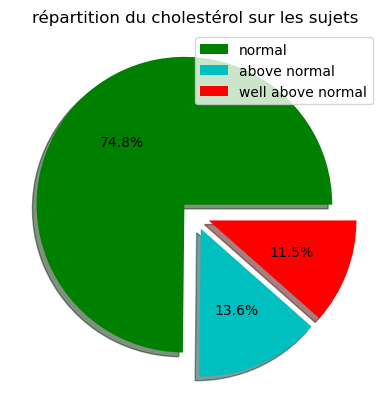

In [22]:
cholesterol_value = df_cardio.cholesterol.value_counts()
mylabes = ['normal','above normal', 'well above normal']
myexplodes = [0.1, 0.1, 0.1,]
mycolors = ['g', 'c', 'r']
plt.pie(cholesterol_value, explode = myexplodes, colors=mycolors,autopct='%1.1f%%', shadow = True)
plt.legend(mylabes)
plt.title('répartition du cholestérol sur les sujets')
plt.savefig("./plotss/repart_cholesterol.png")

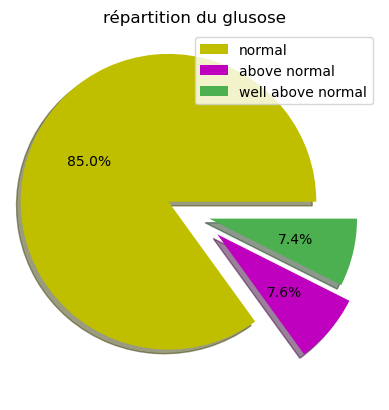

In [23]:
gluc_value = df_cardio.gluc.value_counts()
mylabes = ['normal','above normal', 'well above normal']
myexplodes = [0.2, 0.2, 0.1]
mycolors = ["y", "m", "#4CAF50"]
plt.pie(gluc_value, explode = myexplodes, colors=mycolors,autopct='%1.1f%%', shadow = True)
plt.legend(mylabes)
plt.title('répartition du glusose')
plt.savefig("./plotss/repart_glucose.png")

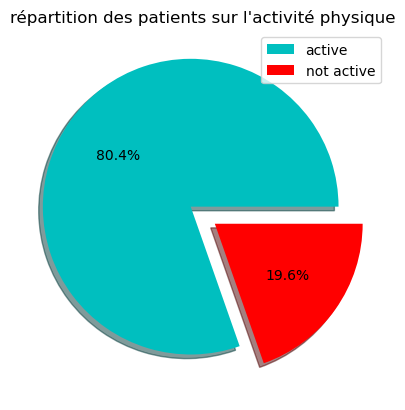

In [24]:
gluc_value = df_cardio.active.value_counts()
mylabes = ['active','not active']
myexplodes = [0.1, 0.1]
mycolors = ['c', 'r']
plt.pie(gluc_value, explode = myexplodes, colors=mycolors,autopct='%1.1f%%', shadow = True)
plt.legend(mylabes)
plt.title("répartition des patients sur l'activité physique")
plt.savefig("./plotss/physical activity.png")

In [25]:
#df_cardio.cardio.value_counts()
#(df_cardio.cardio.value_counts())/ len(df_cardio)

#### - Preprocessing

##### -  Suppression des outliers dans les variables weight , height, ap_lo et ap_hi

In [26]:
# Suppression des outliers dans la variable weight

q25 = np.percentile(df_cardio['weight'], 25)
q75 = np.percentile(df_cardio['weight'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower= q25 - cut_off
upper = q75 + cut_off
df_cardio.loc[df_cardio['weight']< lower] =np.nan
df_cardio.loc[df_cardio['weight']> upper] = np.nan
df_cardio1 = df_cardio.copy()
df_cardio1 = df_cardio.dropna(axis=0)

In [54]:
q25 = np.percentile(df_cardio1['height'], 25)
q75 = np.percentile(df_cardio1['height'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower= q25 - cut_off
upper = q75 + cut_off
df_cardio1.loc[df_cardio1['height']< lower] =np.nan
df_cardio1.loc[df_cardio1['height']> upper] = np.nan
df_cardio1 = df_cardio1.dropna(axis=0)
df_cardio1.shape

(62505, 12)

In [28]:
q25 = np.percentile(df_cardio1['ap_lo'], 25)
q75 = np.percentile(df_cardio1['ap_lo'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower= q25 - cut_off
upper = q75 + cut_off
df_cardio1.loc[df_cardio1['ap_lo']< lower] =np.nan
df_cardio1.loc[df_cardio1['ap_lo']> upper] = np.nan
df_cardio1 = df_cardio1.dropna(axis=0)

In [29]:
q25 = np.percentile(df_cardio1['ap_hi'], 25)
q75 = np.percentile(df_cardio1['ap_hi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower= q25 - cut_off
upper = q75 + cut_off
df_cardio1.loc[df_cardio1['ap_hi']< lower] =np.nan
df_cardio1.loc[df_cardio1['ap_hi']> upper] = np.nan
df_cardio1 = df_cardio1.dropna(axis=0)
df_cardio1.shape

(62505, 12)

### 3- Réalisation de la régression logistique avec scikit-learn

In [30]:
# on prend toutes les variables
X= df_cardio1[['age','gender','height','weight','ap_lo','ap_hi','gluc','cholesterol','smoke','alco','active']].values
y= df_cardio1.cardio.values

In [31]:
# Division du dataset en test d'entrainement et test de validation.abs
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 10)

In [32]:
# Mise à l'échelle des features ( feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [33]:
# Construction du modèle 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Prédiction et score
y_pred = logreg.predict(X_test)
print(' Logistic regression model accuracy: {:.4f}'.format(logreg.score (X_test, y_test)))

 Logistic regression model accuracy: 0.7197


##### - Logistic regression with feature selection

In [35]:
# feature selection RFECV method
rfecv = RFECV(LogisticRegression(),step=1, min_features_to_select= 4, cv=6)
X_train_selected = rfecv.fit(X_train,y_train)
X_train_selected.ranking_
print(X_train_selected.get_support())
print(f"Optimal number of features: {X_train_selected.n_features_}")

[ True False False  True  True  True  True  True  True  True  True]
Optimal number of features: 9


#### -  7 features ont été retenu  aprés la sélection

In [37]:
# features selected
X_selected = df_cardio1[['age','weight','ap_lo','ap_hi','gluc','cholesterol','smoke','alco','active']].values
y_s= df_cardio1.cardio.values

In [38]:
# Division du dataset en test d'entrainement et test de validation.abs
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_selected, y_s, train_size=0.7, random_state = 10)

In [39]:
# Mise à l'échelle des features ( feature scaling)
scaler_s = StandardScaler()
X_train1 = scaler_s.fit_transform(X_train_s)
X_test1 = scaler_s.transform (X_test_s)

In [40]:
# Construction du modèle 
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train_s)

LogisticRegression()

In [41]:
# Prédiction
y_pred1 = logreg1.predict(X_test1)
print(' Logistic regression model accuracy: {:.4f}'.format(logreg1.score (X_test1, y_test_s)))

 Logistic regression model accuracy: 0.7212


### 4- Réalisation de la régression logistique du cas d'étude avec une classe python 

In [42]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [43]:
class LogisticRegression():
    
    def __init__(self,learning_rate = 0.001, n_iters = 100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
            n_samples, n_features = X.shape
            self.weights = np.zeros(self.features)
            self.biais = 0
            

### 5- Evaluation des résultats 

In [44]:
# Accuracy
print("accuracy of the model : {:.4f}".format(accuracy_score(y_test, y_pred)))

accuracy of the model : 0.7197


[[7457 2035]
 [3222 6038]]


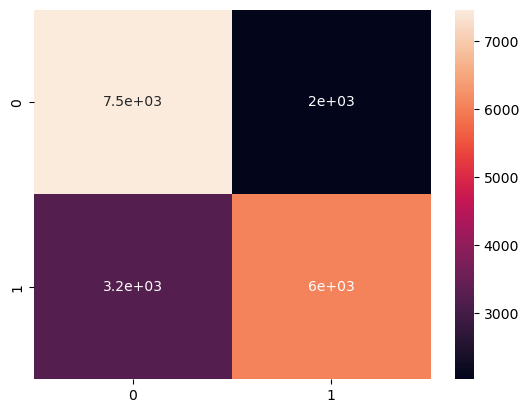

In [45]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(cm)
plt.savefig("./plotss/matrix_confusion.png")

##### - D'aprés la matrice, 7457 et 6038 représentent le nombre de prédictions normales et les deux autres représentent les erreurs.
#####  Il s'agit des False Positive et False Negative.

In [46]:
# roc curve et auc
log_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

In [47]:
log_roc_auc1 = roc_auc_score(y_test,y_pred1)
fpr1, tpr1, thresholds1 = roc_curve(y_test_s, logreg1.predict_proba(X_test1)[:,1])

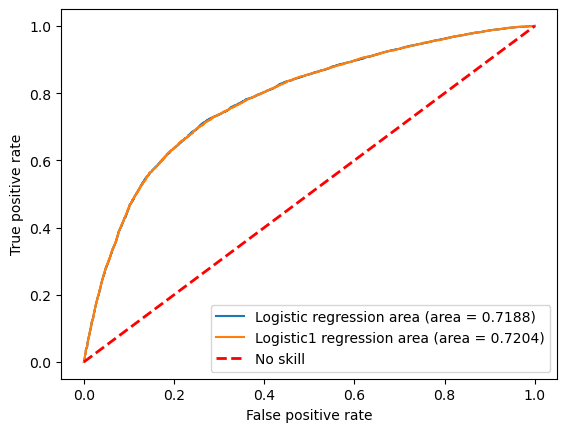

In [48]:
# visualisation roc curve

plt.plot(fpr, tpr, label='Logistic regression area (area = %0.4f)' % log_roc_auc)
plt.plot(fpr1, tpr1, label='Logistic1 regression area (area = %0.4f)' % log_roc_auc1)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='No skill')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.savefig("./plotss/roc_curve.png")

### - Prédiction sur un sujet donné

In [49]:
ap_hi_mean= df_cardio1.ap_hi.mean()

In [50]:
ap_lo_q75 = (np.percentile(df_cardio1.ap_lo, 75)).mean()

In [51]:
#X_p = [[53,2,175,85,90.0,126.4,1,2,1,1,1]]
X_p = scaler.transform([[53,2,175,85,90.0,126.4,1,2,1,1,1]])

In [52]:
logreg.predict(X_p)

array([0.])